# Homework 9.2 - Coding

This is the coding portion of the homework assignment for Section 9.2

In [11]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 9.9

Code up the method `bary_weights()` to compute the barycentric weights for a given set of distinct points $\{x_0, \ldots, x_n\}$. 

Your code should accept a numpy array of distinct points `x_pts` = $\{x_0, \ldots, x_n\}$, and should return a numpy array of the corresponding barycentric weights $\{w_0, w_1, \ldots, w_n\}$, where
$$w_j = \left(\prod_{k = 0, k \neq j}^{n} (x_j - x_k)\right)^{-1}$$
as in Formula (9.6) in the book.

In [ ]:
def bary_weights(x_pts: np.ndarray) -> np.ndarray:
    """Computes barycentric weights from a set of distinct points.
    
    Args:
        x_pts (np.ndarray): An array of n distinct points
    
    Returns:
        np.ndarray: An array of the corresponding n Barycentric weights
    """
    weights = []
    for j in range(len(x_pts)):
        my_prod = []
        for k in range(len(x_pts)):
            if j != k:
                my_prod.append(1 / (x_pts[j] - x_pts[k]))
        weights.append(np.prod(np.array(my_prod)))
    
    return np.array(weights)

Now, use your above method to code up the method `interpolate_barycentric()` which evaluates the unique interpolating polynomial going through the points $\{(x_0, y_0), \ldots, (x_n, y_n)\}$ using Barycentric Lagrange interpolation as described in Section 9.2.3 on page 415 of the textbook.

(Note: A weird edge case where x is too close to any $x_i$ has been handled for you. You need to complete the rest of the logic for this function.)

In [13]:
def interpolate_barycentric(
    interp_pts: np.ndarray,
    x: float
) -> float:
    """Evaluates the unique interpolating polynomial through a set
    of 2D points at a given x-value in the domain.
    
    Args:
        interp_pts (np.ndarray): A (n,2) ndarray of interpolation
            points. Should be structured as
            [[x_0, y_0], [x_1, y_1], ..., [x_n, y_n]]
        x (float): The point at which to evaluate the unique 
            interpolating polynomial through these points.
    
    Returns:
        float: The y-value of the unique interpolating polynomial
            at the point x.
    """
    # EDGE CASE: If x is too close to one of the xi values, return the
    # corresponding yi value instead of dividing by (x-x_i), which is
    # essentially 0
    for pt in interp_pts:
        xi = pt[0]
        yi = pt[1]
        if np.allclose(x, xi):
            return yi 
    w = bary_weights(interp_pts[:,0])

    # MAIN ALGORITHM
    # for j in range(np.shape(interp_pts)[0]):
    #     num = (w[j] * interp_pts[j:1]) / (x - interp_pts[j:0])
    #     den = (w[j])                   / (x - interp_pts[j:0])

    num = np.sum((w * interp_pts[:,1]) / (x - interp_pts[:, 0]))
    den = np.sum((w)                   / (x - interp_pts[:, 0]))
    return num / den

Below is some code that runs your function against the function/interpolating polynomial in Example 9.2.13. Your function should be working well enough when your output matches the correct interpolating polynomial at a bunch of refined points (that is, when the cell runs with no errors and the output of the cell is `True`)

In [14]:
# Function from Example 9.2.13
f = lambda x: 1/(1 + 25 * x**2)
act_interp_poly = lambda x: 1250/377 * x**4 - 3225/754*x**2 + 1  # Actual interpolating polynomial

# Get interpolation points
xi = np.array([-1, -1/2, 0, 1/2, 1])
yi = f(xi)
interp_pts = np.column_stack((xi, yi))

# Compute Barycentric Lagrange polynomial at a bunch of points
x_vals = np.linspace(-1, 1, 100)
computed_poly_vals = np.array([
    interpolate_barycentric(interp_pts, x) for x in x_vals
])

# Get actual interpolating polynomial at these eame points
act_poly_vals = act_interp_poly(x_vals)

# Compare these outputs to ensure we have the same answer
print("FUNCTION GIVES CORRECT ANSWER FOR EXAMPLE 9.2.13:", np.allclose(computed_poly_vals, act_poly_vals))

FUNCTION GIVES CORRECT ANSWER FOR EXAMPLE 9.2.13: True


## Problem 9.10

Use your `interpolate_barycentric()` method from above to compute various interpolating polynomials of $f(x) = |x|$ by doing the following:

For $n = 2, 3, \ldots, 20$: 

1. Sample at $n+1$ evenly spaced points on $[-1,1]$ to get $x_i$ values
2. Evaluate $f(x) = |x|$ at each $x_i$ to get your $y_i$ values (that is, $y_i = f(x_i) = |x_i|$)
3. For each $x$ value in the provided plotting linspace `x_vals`, evaluate the interpolating polynomial of your computed $(x_i, y_i)$ values from steps 1 and 2 at that $x$ using `interpolate_barycentric()` from the previous problem (HINT: The code in the cell checking your `interpolate_barycentric()` function for correctness should demonstrate a good way for calling this function and using its outputs).
4. For each $x$ value in the provided plotting linspace `x_vals`, evaluate the original function $f(x) = |x|$ using the provided lambda function `f`. 
5. Plot the original function $f(x) = |x|$ using the plotting linspace `x_vals` and the outputs of step (4)
6. On the same axis, plot the interpolating polynomial by using the x-values in the plotting linspace `x_vals` and the outpus of step (3)
7. Approximate the $L^\infty$ norm error of the interpolating polynomial by taking the absolute value of the difference between the original function outputs from step 4 and the interpolation outputs from step 3. 
8. Title your plot with the value of $n$ and the $L^{\infty}$ norm error.
9. Show the plot


If done right, each of these steps should be no more than 1-3 lines of code inside the for-loop.


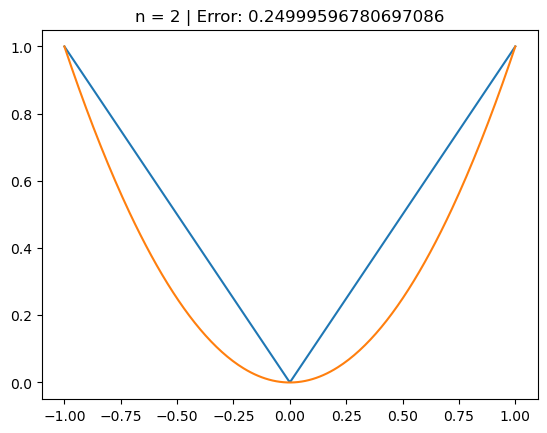

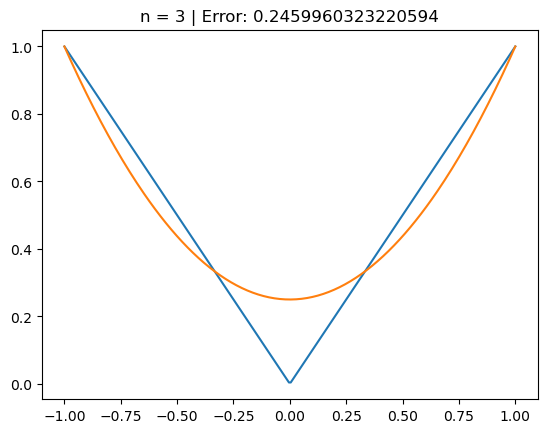

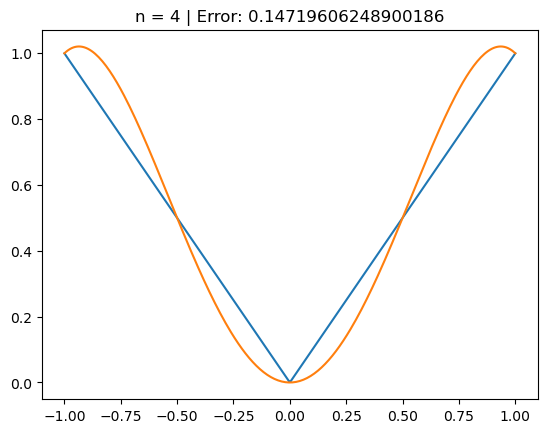

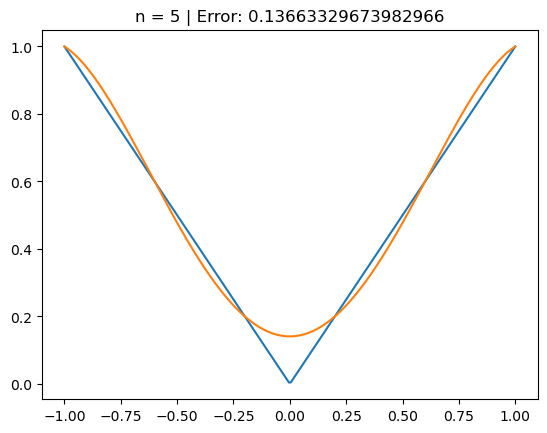

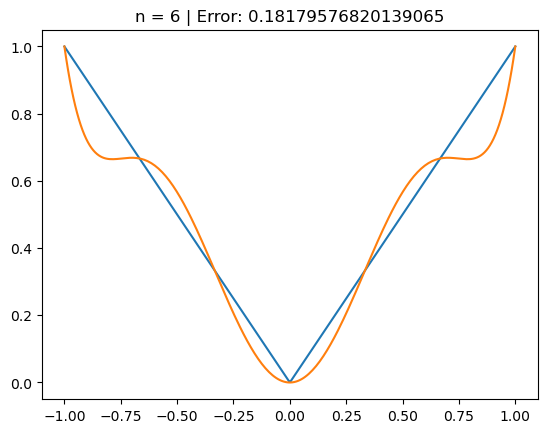

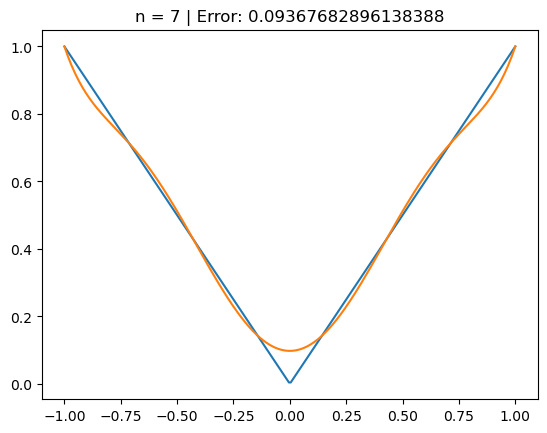

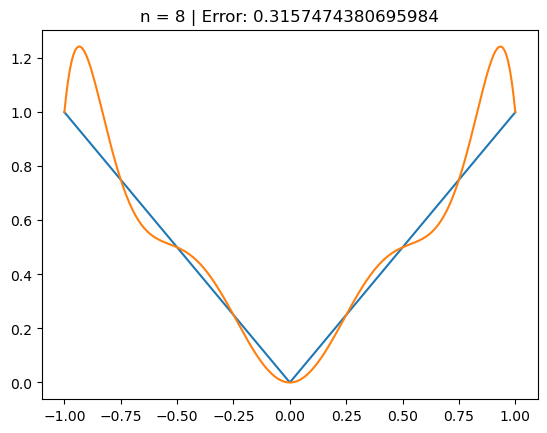

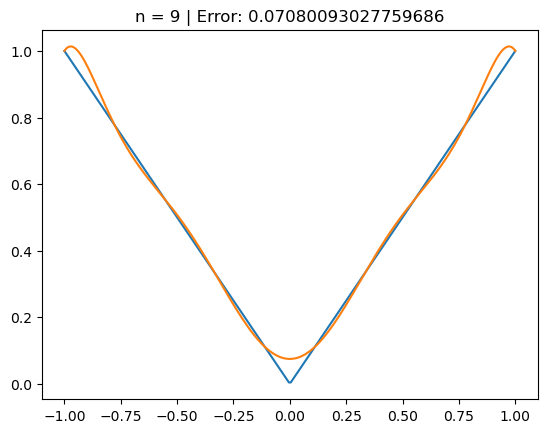

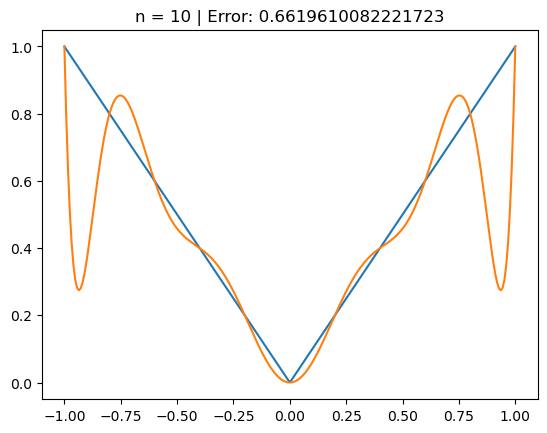

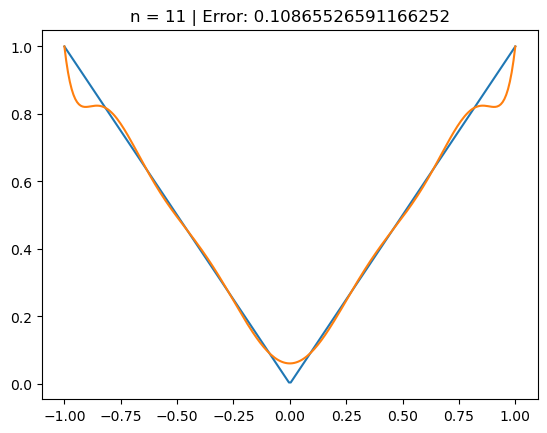

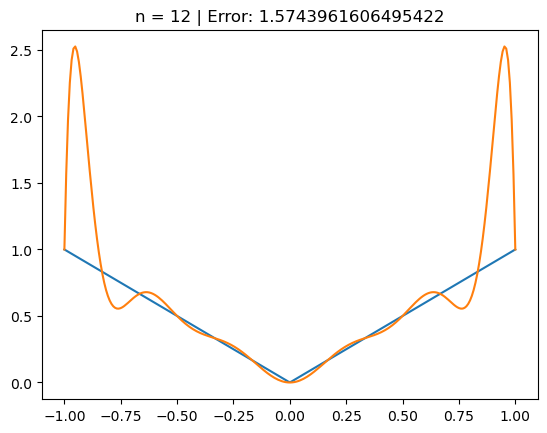

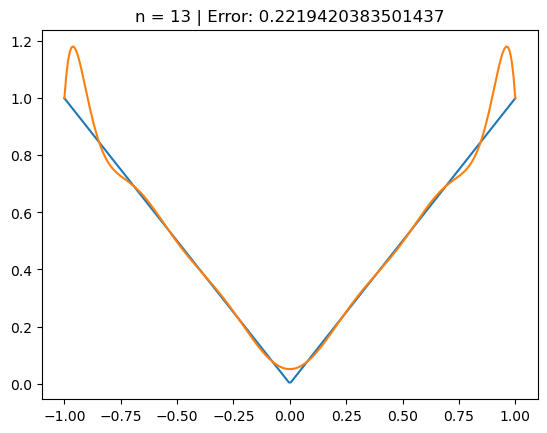

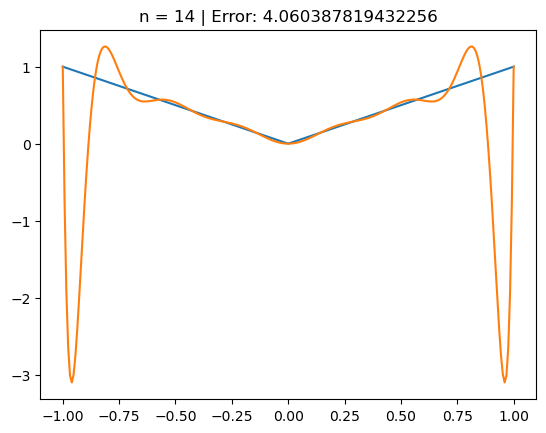

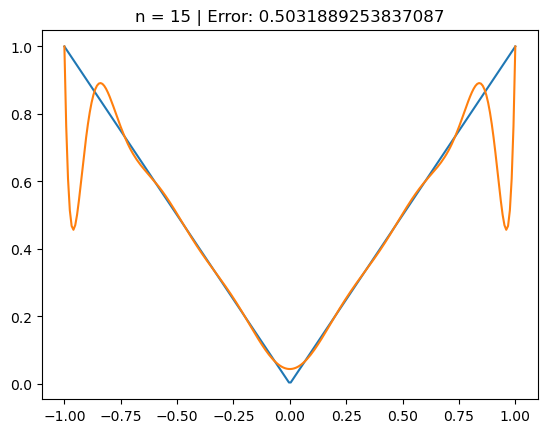

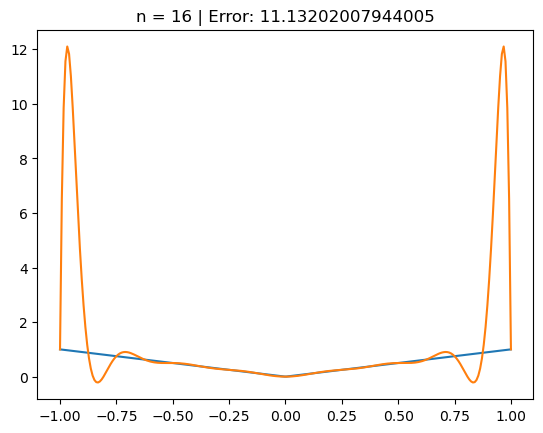

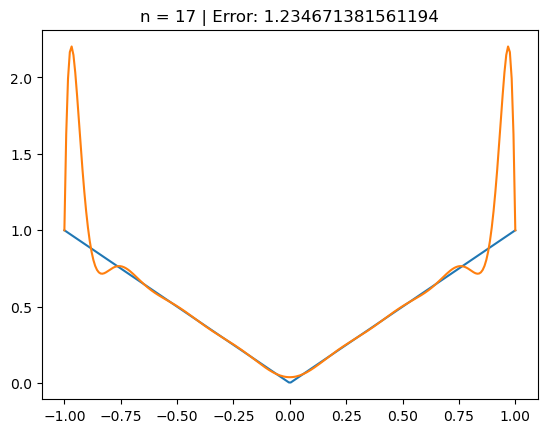

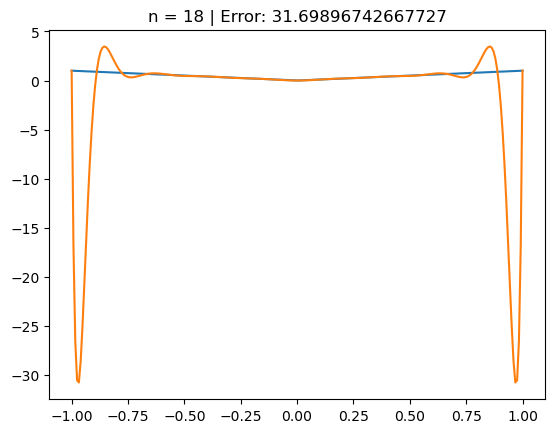

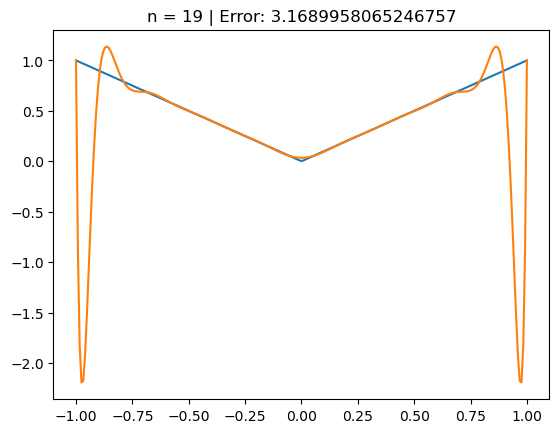

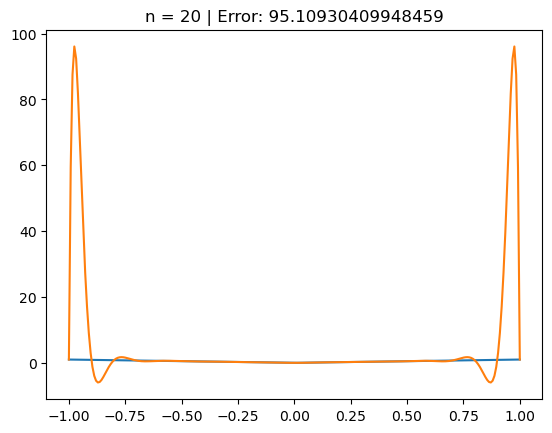

In [16]:
f = lambda x: np.abs(x)                 # Function of interest
x_vals = np.linspace(-1, 1, 250)        # Linspace for plotting

for n in range(2, 21):
    samples = np.linspace(-1, 1, n+1) # interpolating points
    y_vals = f(samples)

    interp_pts = np.column_stack((samples, y_vals))

    # Compute Barycentric Lagrange polynomial at a bunch of points
    computed_poly_vals = np.array([
        interpolate_barycentric(interp_pts, x) for x in x_vals
    ])

    plt.plot(x_vals, f(x_vals))
    plt.plot(x_vals, computed_poly_vals)
    err = np.max(np.abs(f(x_vals) - computed_poly_vals))
    plt.title(f"n = {n} | Error: {err}")
    plt.show()
    

Which $n$ is the "best" in terms of $L^\infty$ error?

**RESPONSE:** n = 9

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.